In [1]:
file_path = "/content/students.csv"


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/students.csv")
df

# Quick preview
print(df.shape)
df
print(df.head())
df


(200, 7)
   StudentID               Name  Age                          Email  \
0       3336       David Palmer   19             sean43@hotmail.com   
1       8774       Andrew Roach   23             vbecker@harvey.com   
2       1396  Jonathan Gonzalez   22           hollydavis@gmail.com   
3       6716     Kenneth Morrow   24  ganderson@wheeler-atkins.info   
4       8830   Kaitlyn Martinez   18           hayesdiane@gmail.com   

    Department   GPA  GraduationYear  
0  Mathematics  3.16            2026  
1    Chemistry  3.75            2027  
2      Physics  2.95            2027  
3      Physics  3.55            2029  
4    Chemistry  2.29            2025  


,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025
...,...,...,...,...,...,...,...
195,3274,Catherine Velasquez,22,fsutton@gmail.com,Physics,2.71,2025
196,3609,Joyce Thomas,19,zanderson@barrera.net,Chemistry,2.22,2030
197,9179,Theresa Hughes,21,mstanley@yahoo.com,Mathematics,3.23,2025
198,4463,Steven Golden,19,nvasquez@yahoo.com,Computer Science,3.90,2025


Missing values by column:
 StudentID         0
Name              0
Age               0
Email             0
Department        0
GPA               0
GraduationYear    0
dtype: int64 

=== Overall Descriptive Statistics ===
                count        mean       std     min       25%      50%  \
Age             200.0    21.58000  2.267002    18.0    20.000    22.00   
GPA             200.0     3.02785  0.591120     2.0     2.525     3.08   
GraduationYear  200.0  2027.18000  2.011924  2024.0  2025.000  2027.00   

                    75%      max  
Age               24.00    25.00  
GPA                3.51     3.99  
GraduationYear  2029.00  2030.00   

=== Department-wise GPA Statistics ===
                      mean  median   min   max       std  count
Department                                                     
Physics           3.123922    3.21  2.01  3.97  0.590254     51
Mathematics       3.080667    3.17  2.02  3.99  0.535054     30
Computer Science  3.044348    3.12  2.00  3.9

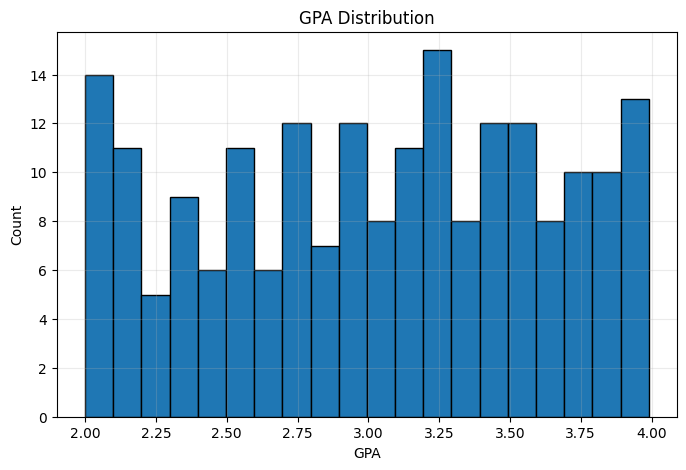

/tmp/ipython-input-2172115197.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_dept, labels=dept_order, showmeans=True)


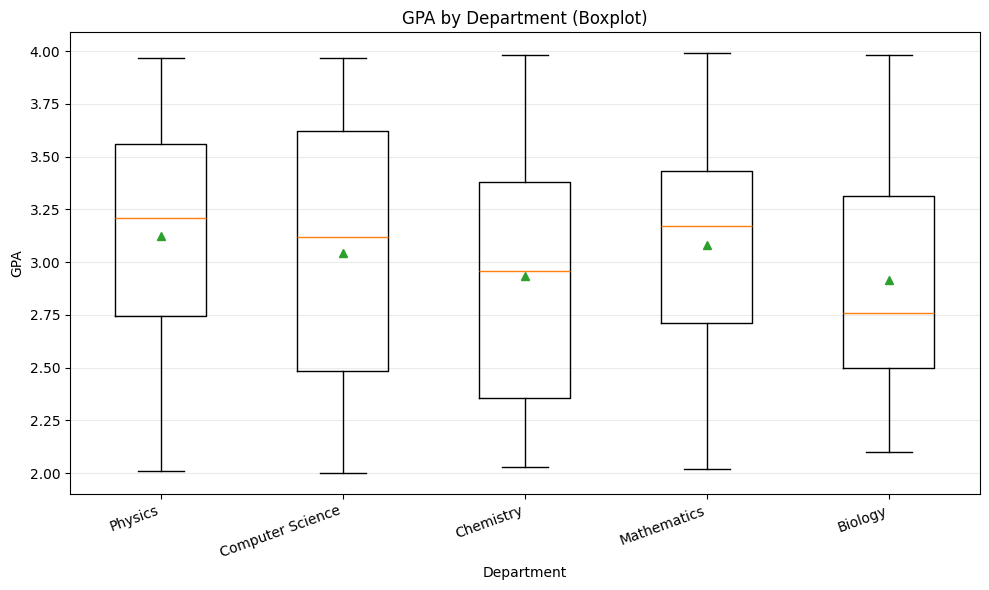

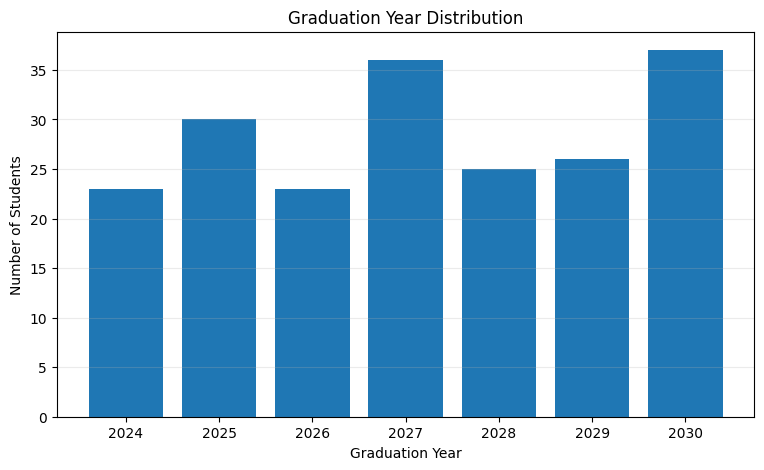

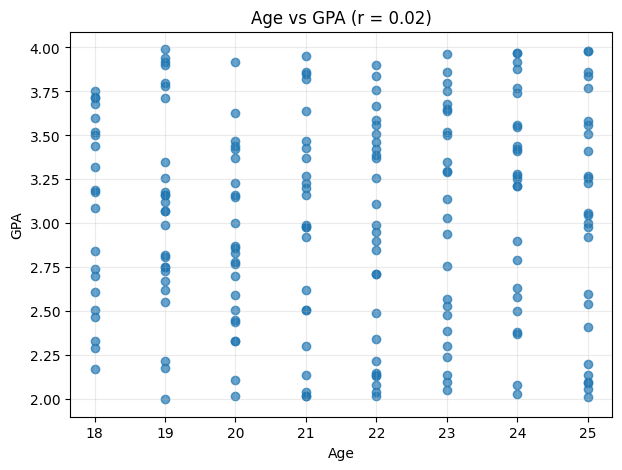

=== Top 5 Students by GPA (Overall) ===
 StudentID          Name       Department  GPA  GraduationYear
      7637     Peter Day      Mathematics 3.99            2029
      7265  Kevin Bowman        Chemistry 3.98            2030
      8314 Clinton Weber          Biology 3.98            2027
      2921    Sean Davis Computer Science 3.97            2024
      7574   Robert Berg          Physics 3.97            2030

=== Bottom 5 Students by GPA (Overall) ===
 StudentID               Name       Department  GPA  GraduationYear
      1363     Christine Park Computer Science 2.00            2027
      9098       Larry Torres          Physics 2.01            2030
      9144  Taylor Krueger II Computer Science 2.02            2025
      4235 Cynthia Parker DVM      Mathematics 2.02            2028
      9239     Anthony Graham      Mathematics 2.02            2026

=== Departments Ranked by Mean GPA ===
Department
Physics             3.123922
Mathematics         3.080667
Computer Science    3

In [4]:
# ============================================
# Student Dataset: Statistical Analysis (Colab)
# File path: /content/students.csv
# ============================================

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Config ---
FILE_PATH = "/content/students.csv"  # Change if needed

# --- Load data ---
df = pd.read_csv(FILE_PATH)

# --- Quick sanity checks / basic cleaning ---
# Strip whitespace from string columns (helps avoid category issues)
for col in ["Name", "Email", "Department"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Ensure numeric columns are numeric
for col in ["Age", "GPA", "GraduationYear", "StudentID"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Report missing values (if any)
missing_summary = df.isna().sum().sort_values(ascending=False)
print("Missing values by column:\n", missing_summary, "\n")

# Drop rows with missing core fields for analysis (optional; tweak as needed)
core_cols = ["Age", "GPA", "GraduationYear", "Department"]
df_clean = df.dropna(subset=[c for c in core_cols if c in df.columns]).copy()

# --- 1) Overall Descriptive Statistics ---
desc_stats = df_clean[["Age", "GPA", "GraduationYear"]].describe().T
print("=== Overall Descriptive Statistics ===")
print(desc_stats, "\n")

# --- 2) Department-wise GPA Statistics ---
dept_gpa_stats = (
    df_clean.groupby("Department")["GPA"]
    .agg(["mean", "median", "min", "max", "std", "count"])
    .sort_values("mean", ascending=False)
)
print("=== Department-wise GPA Statistics ===")
print(dept_gpa_stats, "\n")

# --- 3) Graduation Year Distribution ---
grad_year_counts = df_clean["GraduationYear"].value_counts().sort_index()
print("=== Graduation Year Distribution ===")
print(grad_year_counts, "\n")

# --- 4) Correlation: Age vs GPA ---
age_gpa_corr = df_clean["Age"].corr(df_clean["GPA"])
print(f"=== Correlation (Age vs GPA) ===\nCorrelation coefficient: {age_gpa_corr:.4f}\n")

# --- Optional: Save results to CSVs in Colab for download ---
desc_stats.to_csv("/content/desc_stats.csv")
dept_gpa_stats.to_csv("/content/dept_gpa_stats.csv")
grad_year_counts.to_csv("/content/grad_year_distribution.csv")
print("Saved summary tables to:")
print(" - /content/desc_stats.csv")
print(" - /content/dept_gpa_stats.csv")
print(" - /content/grad_year_distribution.csv\n")

# =========================
# Visualization (Matplotlib)
# =========================

# 1) GPA Distribution (Histogram + Rug-like jitter)
plt.figure(figsize=(8, 5))
plt.hist(df_clean["GPA"], bins=20, edgecolor="black")
plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.grid(alpha=0.25)
plt.show()

# 2) GPA by Department (Boxplot)
# Prepare data as list of arrays in department order
dept_order = df_clean["Department"].value_counts().index.tolist()
data_by_dept = [df_clean.loc[df_clean["Department"] == d, "GPA"].values for d in dept_order]

plt.figure(figsize=(10, 6))
plt.boxplot(data_by_dept, labels=dept_order, showmeans=True)
plt.title("GPA by Department (Boxplot)")
plt.xlabel("Department")
plt.ylabel("GPA")
plt.xticks(rotation=20, ha="right")
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.show()

# 3) Graduation Year Distribution (Bar Chart)
plt.figure(figsize=(9, 5))
plt.bar(grad_year_counts.index.astype(str), grad_year_counts.values)
plt.title("Graduation Year Distribution")
plt.xlabel("Graduation Year")
plt.ylabel("Number of Students")
plt.grid(axis="y", alpha=0.25)
plt.show()

# 4) Age vs GPA (Scatter)
plt.figure(figsize=(7, 5))
plt.scatter(df_clean["Age"], df_clean["GPA"], alpha=0.7)
plt.title(f"Age vs GPA (r = {age_gpa_corr:.2f})")
plt.xlabel("Age")
plt.ylabel("GPA")
plt.grid(alpha=0.25)
plt.show()

# --- Nice-to-have: Top/Bottom performers by Department ---
top_n = 5
print(f"=== Top {top_n} Students by GPA (Overall) ===")
print(
    df_clean.sort_values("GPA", ascending=False)
    [["StudentID", "Name", "Department", "GPA", "GraduationYear"]]
    .head(top_n)
    .to_string(index=False)
)

print(f"\n=== Bottom {top_n} Students by GPA (Overall) ===")
print(
    df_clean.sort_values("GPA", ascending=True)
    [["StudentID", "Name", "Department", "GPA", "GraduationYear"]]
    .head(top_n)
    .to_string(index=False)
)

# --- Optional: Department-level ordering preview ---
print("\n=== Departments Ranked by Mean GPA ===")
print(dept_gpa_stats["mean"])


=== Linear Regression Results ===
RMSE: 0.629
R²: -0.147

=== Feature Importance (Coefficients) ===
                       Feature  Coefficient
5           Department_Physics     0.317461
4       Department_Mathematics     0.138565
3  Department_Computer Science     0.072548
2         Department_Chemistry     0.045567
1               GraduationYear     0.014736
0                          Age    -0.004451


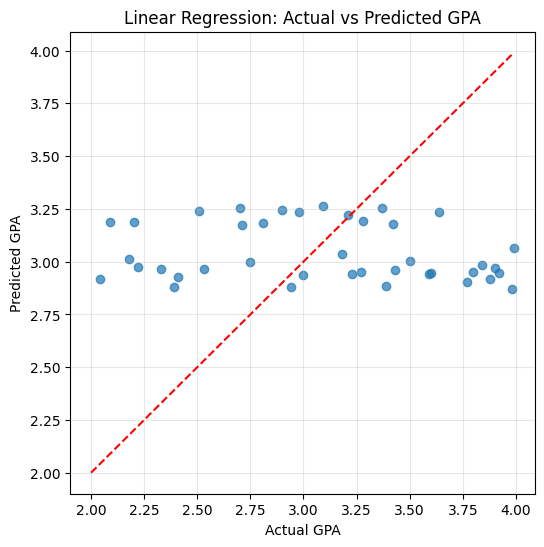

In [5]:
# ============================================
# Linear Regression on Student Dataset (Colab)
# Target: GPA
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# --- Load dataset ---
df = pd.read_csv("/content/students.csv")

# --- Features & Target ---
X = df[["Age", "Department", "GraduationYear"]]   # predictors
y = df["GPA"]                                     # target

# --- Encode categorical feature (Department) ---
X_encoded = pd.get_dummies(X, columns=["Department"], drop_first=True)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# --- Model Training ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Evaluation ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Results ===")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}\n")

# --- Coefficients ---
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values("Coefficient", ascending=False)

print("=== Feature Importance (Coefficients) ===")
print(coeffs)

# --- Plot: Predicted vs Actual GPA ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Linear Regression: Actual vs Predicted GPA")
plt.grid(alpha=0.3)
plt.show()


=== Dataset Shape ===
(200, 7) 

=== First 5 Rows ===
   StudentID               Name  Age                          Email  \
0       3336       David Palmer   19             sean43@hotmail.com   
1       8774       Andrew Roach   23             vbecker@harvey.com   
2       1396  Jonathan Gonzalez   22           hollydavis@gmail.com   
3       6716     Kenneth Morrow   24  ganderson@wheeler-atkins.info   
4       8830   Kaitlyn Martinez   18           hayesdiane@gmail.com   

    Department   GPA  GraduationYear  
0  Mathematics  3.16            2026  
1    Chemistry  3.75            2027  
2      Physics  2.95            2027  
3      Physics  3.55            2029  
4    Chemistry  2.29            2025   

=== Descriptive Statistics ===
         StudentID         Age        GPA  GraduationYear
count   200.000000  200.000000  200.00000      200.000000
mean   5726.460000   21.580000    3.02785     2027.180000
std    2507.407622    2.267002    0.59112        2.011924
min    1066.000000  

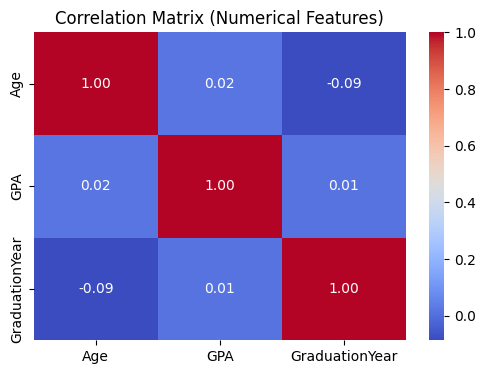

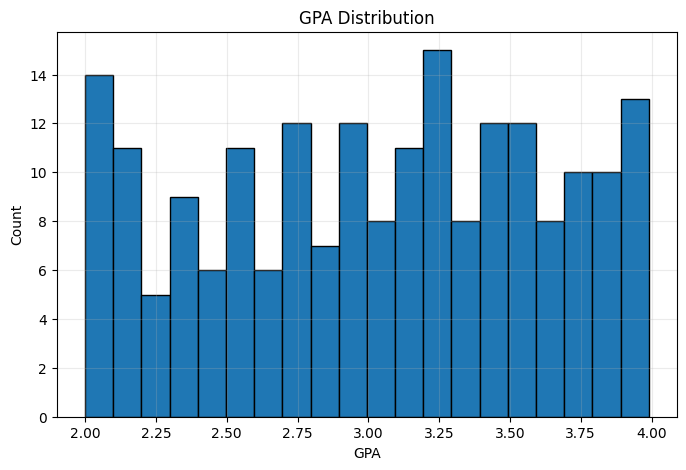

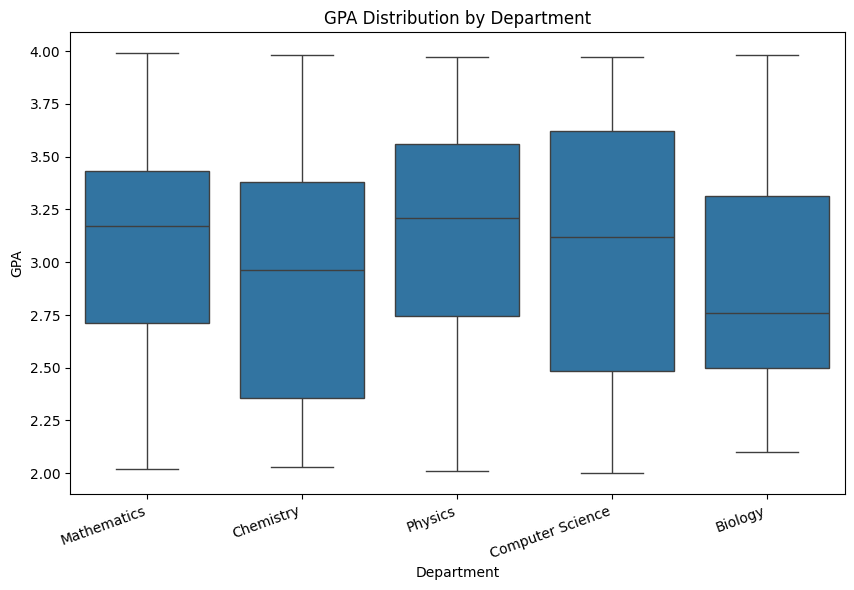

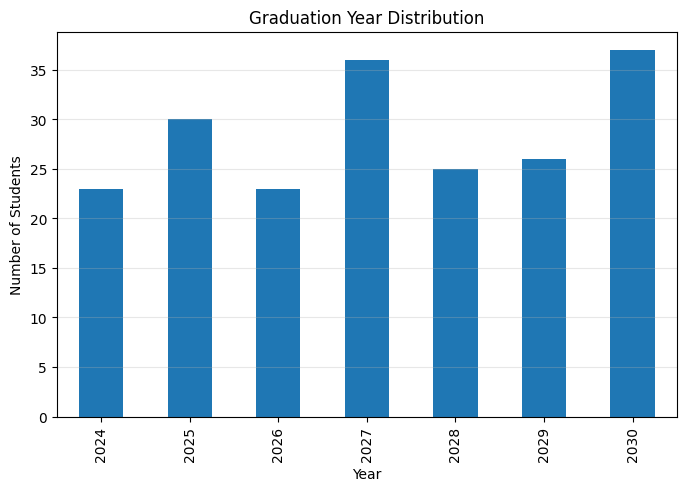

=== Linear Regression Metrics ===
RMSE: 0.629
R² Score: -0.147



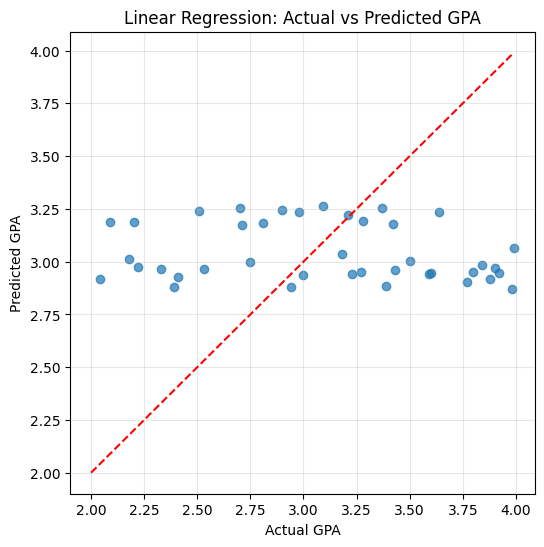

=== Logistic Regression (High vs Low GPA) ===
Accuracy : 0.450
Precision: 0.529
Recall   : 0.391
F1 Score : 0.450



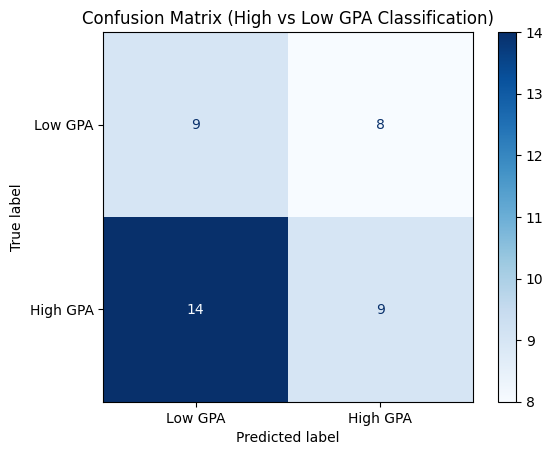

In [6]:
# ============================================
# Full EDA + Regression + Classification Analysis
# Student Dataset (/content/students.csv)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
from sklearn.preprocessing import OneHotEncoder

# --- Load dataset ---
df = pd.read_csv("/content/students.csv")

# Clean up whitespace
for col in ["Name", "Email", "Department"]:
    df[col] = df[col].astype(str).str.strip()

# ======================================
# 1. Exploratory Data Analysis (EDA)
# ======================================

print("=== Dataset Shape ===")
print(df.shape, "\n")

print("=== First 5 Rows ===")
print(df.head(), "\n")

print("=== Descriptive Statistics ===")
print(df.describe(), "\n")

# --- Correlation Matrix ---
plt.figure(figsize=(6,4))
sns.heatmap(df[["Age","GPA","GraduationYear"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# --- GPA Distribution ---
plt.figure(figsize=(8,5))
plt.hist(df["GPA"], bins=20, edgecolor="black")
plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.grid(alpha=0.25)
plt.show()

# --- GPA by Department (Boxplot) ---
plt.figure(figsize=(10,6))
sns.boxplot(x="Department", y="GPA", data=df)
plt.title("GPA Distribution by Department")
plt.xticks(rotation=20, ha="right")
plt.show()

# --- Graduation Year Distribution ---
plt.figure(figsize=(8,5))
df["GraduationYear"].value_counts().sort_index().plot(kind="bar")
plt.title("Graduation Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.grid(axis="y", alpha=0.3)
plt.show()

# ======================================
# 2. Regression: Predict GPA
# ======================================

X = df[["Age", "Department", "GraduationYear"]]
y = df["GPA"]

# One-hot encode Department
X_encoded = pd.get_dummies(X, columns=["Department"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# --- Metrics ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Metrics ===")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}\n")

# --- Predicted vs Actual GPA ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Linear Regression: Actual vs Predicted GPA")
plt.grid(alpha=0.3)
plt.show()

# ======================================
# 3. Classification: High GPA vs Low GPA
# ======================================

# Define threshold for "High GPA" (>=3.0)
df["HighGPA"] = (df["GPA"] >= 3.0).astype(int)

X_class = pd.get_dummies(df[["Age", "Department", "GraduationYear"]], drop_first=True)
y_class = df["HighGPA"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_c, y_train_c)
y_pred_c = logreg.predict(X_test_c)

# --- Classification Metrics ---
acc = accuracy_score(y_test_c, y_pred_c)
prec = precision_score(y_test_c, y_pred_c)
rec = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("=== Logistic Regression (High vs Low GPA) ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}\n")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low GPA","High GPA"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (High vs Low GPA Classification)")
plt.show()
